In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV

In [2]:
from sklearn.datasets import load_linnerud
figsize = [18, 4]

In [3]:
#1. Data normalization
  #  - Look at features of Linnerud dataset, tell what is the problem with them
      #    from sklearn.datasets import load_linnerud
   # - Normalize these features using a correct method. Plot original vs normalized probability density.

In [4]:
dataset = load_linnerud()
target = np.array(dataset.feature_names) == "Chins"
X = dataset.data[:,np.logical_not(target)]
#y = dataset.target
names = dataset['feature_names']
y = dataset.data[:, target].squeeze()

In [5]:
#dataset.data,dataset.feature_names,dataset.target,dataset.target_names

In [6]:
dataset.feature_names

['Chins', 'Situps', 'Jumps']

In [13]:
Xt, Xs, Yt, Ys = train_test_split(X, y, random_state=40)

In [14]:
Yt=Yt.reshape(-1,1)

In [15]:
Ys=Ys.reshape(-1,1)

In [16]:
Xt.shape,Xs.shape,Yt.shape,Ys.shape

((15, 2), (5, 2), (15, 1), (5, 1))

In [17]:
model = RidgeCV().fit(Xt, Yt)
model.score(Xs, Ys) * 100

62.48075907946129

In [18]:
from sklearn.preprocessing import StandardScaler, RobustScaler
sts = StandardScaler().fit(Xt)
rts = RobustScaler().fit(Xt)

In [19]:
i = 0
data_original = pd.Series(Xs[:,i], name=names[i])
data_sts = pd.Series(sts.transform(Xs)[:,i], name=names[i] + " \n StandardScaler")
data_rts = pd.Series(rts.transform(Xs)[:,i], name=names[i] + " \n RobustScaler")

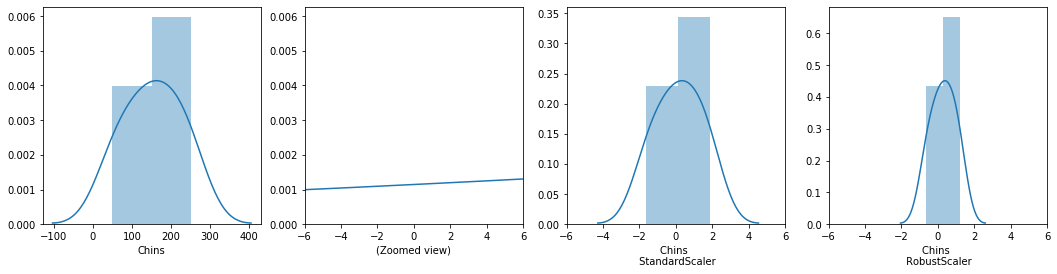

In [20]:
matplotlib.rcParams['figure.figsize'] = figsize
fig, ax = plt.subplots(1,4)
sns.distplot(data_original, ax=ax[0])
sns.distplot(data_original, ax=ax[1], axlabel="(Zoomed view)")
sns.distplot(data_sts, ax=ax[2])
sns.distplot(data_rts, ax=ax[3])
[axis.set_xlim([-6, 6]) for axis in ax[1:]]
plt.show()

In [21]:
model = RidgeCV().fit(Xt, Yt)
model.score(Xs, Ys) * 100

62.48075907946129

In [22]:
model = RidgeCV().fit(sts.transform(Xt), Yt)
model.score(sts.transform(Xs), Ys) * 100

49.15655669092445

In [23]:
model = RidgeCV().fit(rts.transform(Xt), Yt)
model.score(rts.transform(Xs), Ys) * 100

54.98032340303467

In [24]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
qts = QuantileTransformer(output_distribution="normal").fit(Xt)
pts = PowerTransformer().fit(Xt)

C:\Users\shohidul\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (15). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [25]:
i = 0
data_original = pd.Series(Xs[:,i], name=names[i])
data_qt = pd.Series(qts.transform(Xs)[:,i], name=names[i] + " \n QuantileTransformer")
data_pt = pd.Series(pts.transform(Xs)[:,i], name=names[i] + " \n PowerTransformer")

[(-6, 6), (-6, 6), (-6, 6)]

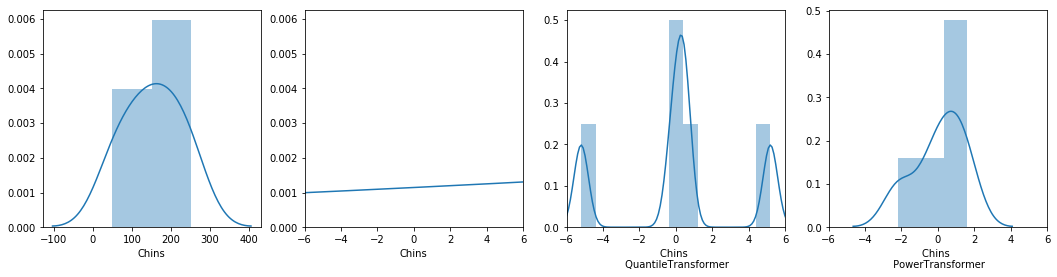

In [26]:
matplotlib.rcParams['figure.figsize'] = figsize
fig, ax = plt.subplots(1,4)
sns.distplot(data_original, ax=ax[0])
sns.distplot(data_original, ax=ax[1])
sns.distplot(data_qt, ax=ax[2])
sns.distplot(data_pt, ax=ax[3])
[axis.set_xlim([-6, 6]) for axis in ax[1:]]

In [27]:
model = RidgeCV().fit(Xt, Yt)
model.score(Xs, Ys) * 100

62.48075907946129

In [28]:
model = RidgeCV().fit(qts.transform(Xt), Yt)
model.score(qts.transform(Xs), Ys) * 100

44.49685849053761

In [29]:
model = RidgeCV().fit(pts.transform(Xt), Yt)
model.score(pts.transform(Xs), Ys) * 100

45.89164268973158

In [30]:
#32.Dimensionality reduction•
#Load 20 News Dataset
from sklearn.datasets import fetch_20newsgroups_vectorized
traindata = fetch_20newsgroups_vectorized(subset='train')

#•Use KernelPCA for dimensionality reduction. 
#Train a classifier at different nr of dimensions, 
#check how model score changes with dimensionsRemember that you can load training and testing subsets of data!



In [25]:
#X=traindata.data

In [26]:
#y=traindata.target

In [27]:
#traindata.keys()

In [28]:
#traindata.feature_names

In [31]:
from sklearn.datasets import fetch_20newsgroups

In [32]:
traindata = fetch_20newsgroups(subset='train')

In [33]:
from pprint import pprint

In [34]:
pprint(list(traindata.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [35]:
traindata.filenames.shape

(11314,)

In [36]:
traindata.target.shape

(11314,)

In [37]:
traindata.target[:10]

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
traindata = fetch_20newsgroups(subset="train")

In [45]:
testdata = fetch_20newsgroups(subset="test")

In [46]:
vectorizer = TfidfVectorizer()

In [47]:
vectors = vectorizer.fit_transform(traindata.data)

In [48]:
vectorstest=vectorizer.fit_transform(testdata.data)

In [49]:
y_test=testdata.target

In [50]:
vectorstest

<7532x93564 sparse matrix of type '<class 'numpy.float64'>'
	with 1164969 stored elements in Compressed Sparse Row format>

In [51]:
vectors

<11314x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

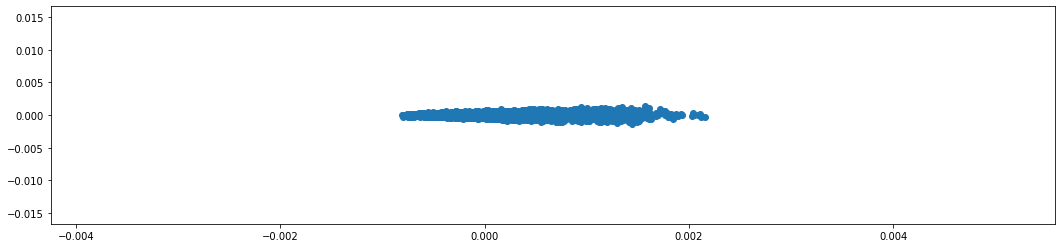

In [52]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel="rbf")
Z = kpca.fit_transform(vectors)
plt.scatter(Z[:,0], Z[:,1])
plt.show()

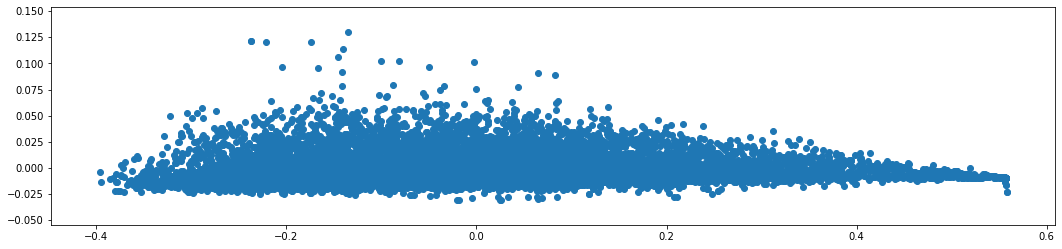

In [85]:
from sklearn.preprocessing import scale
X_df_prepared = scale(vectors,with_mean=False)
Z = kpca.fit_transform(X_df_prepared)
plt.scatter(Z[:,0], Z[:,1])
plt.show()

In [86]:
from sklearn.cluster import k_means

In [87]:
C, J, cost = k_means(Z, n_clusters=20)

In [88]:
C.shape,J.shape,Z.shape,cost.shape

((20, 2), (11314,), (11314, 2), ())

In [89]:
y=traindata.target

In [90]:
y

array([7, 4, 4, ..., 3, 1, 8])

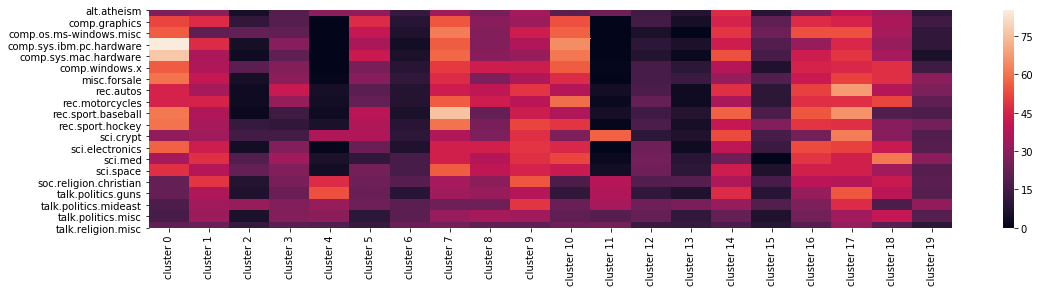

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y,J)
sn.heatmap(cm, yticklabels=traindata['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])

In [100]:
C, J, cost = k_means(Z, n_clusters=12)

In [101]:
y=traindata.target

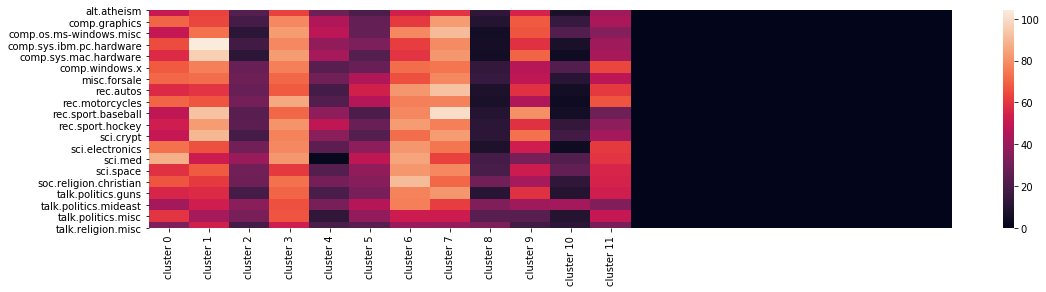

In [102]:
cm = confusion_matrix(y,J)
sn.heatmap(cm, yticklabels=traindata['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(12)])

In [92]:
from hmmlearn.hmm import GaussianHMM

In [93]:
mm = GaussianHMM(n_components=12)
mm=mm.fit(Z)
J = mm.predict(Z)


In [94]:
J.shape

(11314,)

In [95]:
y=traindata.target

In [96]:
y.shape

(11314,)

In [97]:
cm = confusion_matrix(y, J)

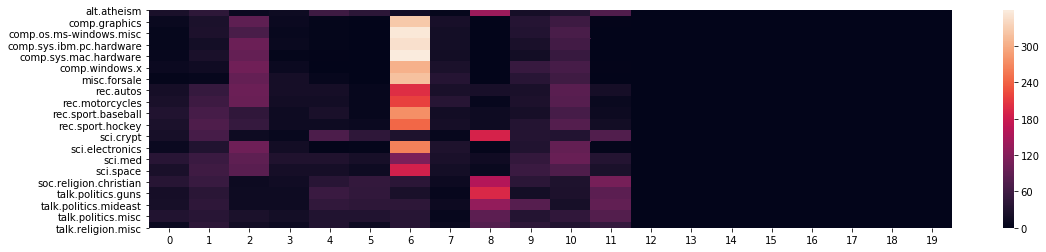

In [99]:
sn.heatmap(cm, yticklabels=traindata['target_names']) 
           

In [103]:
mm = GaussianHMM(n_components=20)
mm=mm.fit(Z)
J = mm.predict(Z)

In [104]:
y=traindata.target

In [105]:
cm = confusion_matrix(y, J)

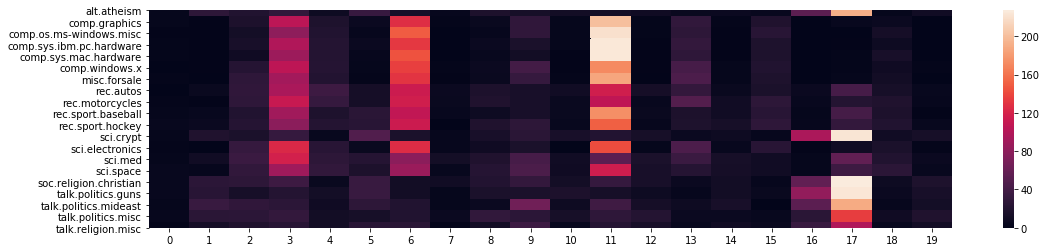

In [106]:
sn.heatmap(cm, yticklabels=traindata['target_names'])